In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
import pickle
import pandas as pd
import ast

## Run-1 (R_0 = 5e-3)

### Load Recording Files

In [93]:
recordings_file = '../data/2022-02-16 20 rate = 0.005/recordings epsilon= 0.0001learning_rate = 0.005spike freq = 10'
recordings = pd.read_pickle(recordings_file)
print(type(recordings))
spk_rec, weight_update_rec, weight_change_rec, weight_rec, r_ij_rec, v_ij_rec, g_ij2_rec = recordings

loss_rec_file = '../data/2022-02-16 20 rate = 0.005/loss_rec epsilon= 0.0001learning_rate = 0.005spike freq = 10'
loss_rec = pd.read_pickle(loss_rec_file).flatten()

<class 'tuple'>


In [28]:
# Get args
args_filename = '../data/2022-02-16 20 rate = 0.005/args epsilon = 0.0001learning_rate = 0.005spike freq = 10'
args_file = open(args_filename, 'r')
args = args_file.read()
#args = ast.literal_eval(args)
print(args)
print(type(args))

#nb_epochs = args['nb_epochs']


{'thres': -50, 'u_rest': -60, 'tau_mem': 0.01, 'tau_syn': 0.005, 'tau_ref': 0.005, 't_rise': 0.005, 't_decay': 0.01, 'timestep_size': 0.0001, 't_rise_alpha': 0.005, 't_decay_alpha': 0.01, 'nb_steps': 5000, 'tau_rms': 0.0005, 'nb_inputs': 100, 'nb_outputs': 1, 'device': device(type='cpu'), 'dtype': torch.float32, 'nb_epochs': 800, 'epsilon': 0.0001, 'alpha': 0.9801986733067553, 'beta': 0.9900498337491681}
<class 'str'>


### Loss Plot

Text(0.5, 0, 'Epoch')

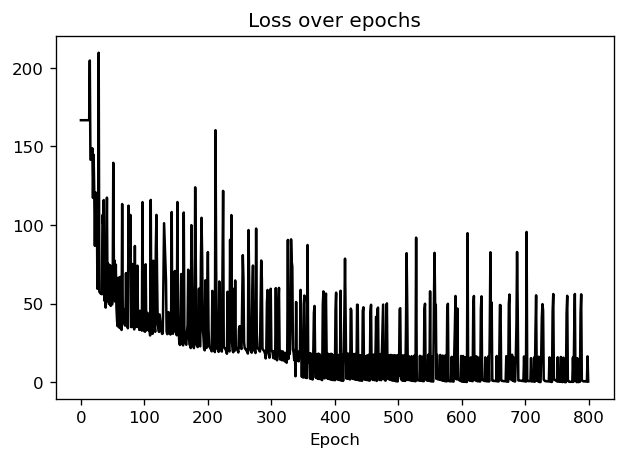

In [16]:
plt.figure(dpi=120)
plt.plot(loss_rec.flatten(), color='black')
plt.title("Loss over epochs")
plt.xlabel("Epoch")

### Overshoot Indices

In [65]:
# Isolate indices where loss jumps:

overshoot_indices = []
for i in range(800 - 1):
    if loss_rec[i] <= 0.1*loss_rec[i+1]:
        overshoot_indices.append(i)

overshoot_indices = np.array(overshoot_indices)
print(overshoot_indices)
print(len(overshoot_indices))

[338 350 356 380 384 395 397 400 405 408 411 413 424 432 434 438 440 443
 450 453 455 460 463 466 471 473 480 487 490 493 496 499 501 506 509 511
 516 520 524 527 533 536 540 546 549 552 555 565 569 573 576 583 587 592
 598 601 604 608 613 617 622 625 629 636 641 643 654 658 669 673 678 680
 684 697 701 708 713 715 720 724 737 742 750 755 759 764 774 776 781 786
 797]
91


In [34]:
print(loss_rec[338])
print(loss_rec[339])

3.8513123989105225
51.099369049072266


In [87]:
loss_overshoot = np.empty_like(overshoot_indices, dtype=float)
for idx, overshoot_indice in enumerate(overshoot_indices):
    loss_overshoot[idx] = loss_rec[overshoot_indice + 1] - loss_rec[overshoot_indice]
    #print(loss_overshoot[idx])

loss_overshoot = np.column_stack((overshoot_indices, loss_overshoot))
print(loss_overshoot)

[[338.          47.24805665]
 [350.          46.56846118]
 [356.          84.59765768]
 [380.          48.12478232]
 [384.          47.58930826]
 [395.          16.08442569]
 [397.          15.12272143]
 [400.          44.63777626]
 [405.          15.7578094 ]
 [408.          56.80726504]
 [411.          16.62772465]
 [413.          16.40894699]
 [424.          45.01912594]
 [432.          16.25680733]
 [434.          47.71958351]
 [438.          16.04330111]
 [440.          15.71001792]
 [443.          44.53289032]
 [450.          15.69029689]
 [453.          16.38629532]
 [455.          43.56864107]
 [460.          16.17232537]
 [463.          16.83882451]
 [466.          45.3892045 ]
 [471.          16.518543  ]
 [473.          15.80689716]
 [480.          48.03720951]
 [487.          15.83229554]
 [490.          15.97833753]
 [493.          16.27254987]
 [496.          16.37589157]
 [499.          16.83159202]
 [501.          42.45796347]
 [506.          16.0488168 ]
 [509.        

### Weight Update Norm

torch.Size([800, 100, 1])
(800, 1)


Text(0.5, 0, 'Epochs')

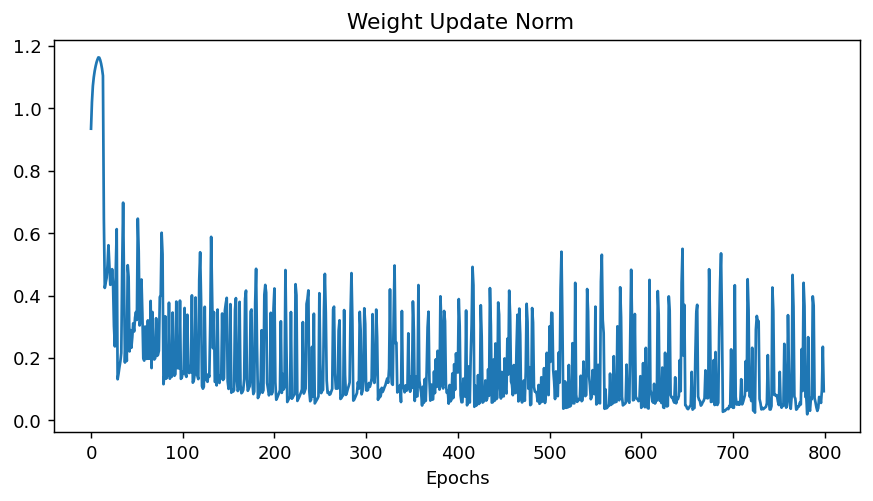

In [54]:
print(weight_change_rec.shape)
#norm = np.zero()
norm = np.linalg.norm(weight_change_rec, axis=1)
print(norm.shape)
plt.figure(dpi = 130, figsize=(8,4))
plt.plot(norm)
plt.title(" Weight Update Norm")
plt.xlabel("Epochs")

In [71]:
# Avg norm at overshoot indices:
print(norm[overshoot_indices].shape)
overshoot_norm = np.mean(norm[overshoot_indices])
print("Average weight update norm before overshoot", overshoot_norm)

# Avg norm of weight updates overall
avg_norm = np.mean(norm)
print("Overall average weight update norm", avg_norm)


(91, 1)
Average weight update norm before overshoot 0.0679064
Overall average weight update norm 0.18826942


### Spike Train Change

torch.Size([800, 5000])


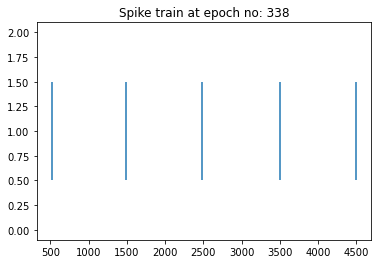

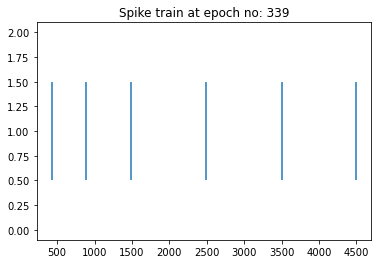

In [76]:
print(spk_rec.shape)

def juxtapose_spk_trains(i, j, spk_rec):
    """ Plot two spike trains at given two epochs."""
    positions = np.arange(0, 5000)
    spike_positions = positions[spk_rec[i] == 1]
    plt.figure()
    plt.eventplot(spike_positions)
    plt.title("Spike train at epoch no: " + str(i))

    positions = np.arange(0, 5000)
    spike_positions = positions[spk_rec[j] == 1]
    plt.figure()dpi=100)
    plt.eventplot(spike_positions)
    plt.title("Spike train at epoch no: " + str(j))

juxtapose_spk_trains(338, 339, spk_rec)

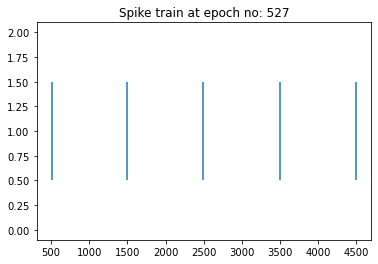

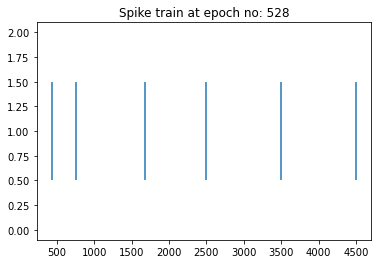

In [88]:
juxtapose_spk_trains(527, 528, spk_rec)

## Run-2 (R_0 = 10e-3)

In [9]:
recordings_file_2 = '../data/2022-02-17 00 rate = 0.01/recordings epsilon= 0.0001learning_rate = 0.01spike freq = 10'
recordings_2 = pd.read_pickle(recordings_file_2)
#print(type(recordings_2))
#spk_rec, weight_update_rec, weight_change_rec, weight_rec, r_ij_rec, v_ij_rec, g_ij2_rec = recordings_2

loss_rec_file = '../data/2022-02-17 00 rate = 0.01/loss_rec epsilon= 0.0001learning_rate = 0.01spike freq = 10'
loss_rec = pd.read_pickle(loss_rec_file).flatten()
print(loss_rec.shape)

(1000,)


Text(0.5, 0, 'Epoch')

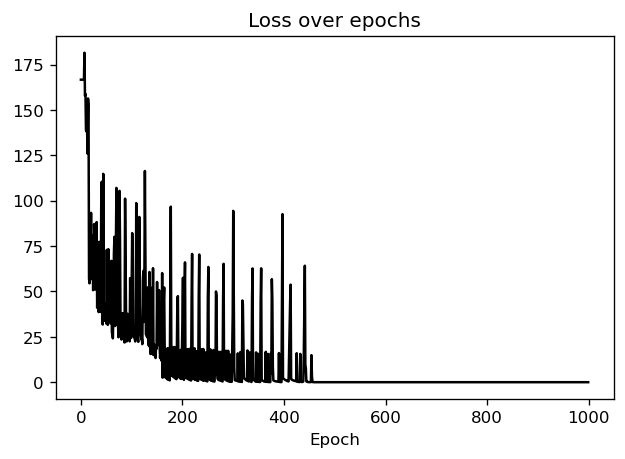

In [10]:
plt.figure(dpi=120)
plt.plot(loss_rec.flatten(), color='black')
plt.title("Loss over epochs")
plt.xlabel("Epoch")